# Stock Price Analysis and Stationarity Tests
This notebook explores the stationarity of stock close prices and returns using data from Yahoo Finance. We perform statistical tests including the Augmented Dickey-Fuller (ADF) and KPSS tests, and visualize the results.

## Step 1: Importing Required Libraries
We begin by importing the necessary Python libraries for data fetching, processing, and visualization.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

## Step 2: Fetching Close Prices
We fetch the historical close prices for the selected stock ticker from Yahoo Finance using the `yfinance` library.

In [2]:
# Define the stock ticker and date range
ticker = 'MSFT'  # Microsoft stock
start_date = '2020-01-01'
end_date = '2025-01-01'

# Fetch the close prices
data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data['Close']

# Display the first few rows of the data
close_prices.head()

[*********************100%***********************]  1 of 1 completed


Ticker,MSFT
Date,
2020-01-02,153.630737
2020-01-03,151.717697
2020-01-06,152.109879
2020-01-07,150.722977
2020-01-08,153.123764


## Step 3: Calculating Returns
We calculate the daily percentage returns from the close prices. Returns represent the relative change in stock price.


In [3]:
# Calculate the daily returns
returns = close_prices.pct_change().dropna()

# Display the first few rows of returns
returns.head()


Ticker,MSFT
Date,
2020-01-03,-0.012452
2020-01-06,0.002585
2020-01-07,-0.009118
2020-01-08,0.015928
2020-01-09,0.012493


## Step 4: Performing Stationarity Tests
### Augmented Dickey-Fuller (ADF) Test
The ADF test checks for the presence of a unit root in a time series. If the p-value is less than 0.05, the series is considered stationary.

### KPSS Test
The KPSS test checks whether a series is stationary around a deterministic trend. If the p-value is greater than 0.05, the series is considered stationary.


In [4]:
# Perform the Augmented Dickey-Fuller Test for close prices
adf_test_close = adfuller(close_prices.dropna(), autolag='AIC')
adf_result_close = {
    'Test Statistic': adf_test_close[0],
    'p-value': adf_test_close[1],
    'Critical Values': adf_test_close[4],
}

# Perform the KPSS Test for close prices
with warnings.catch_warnings(record=True):
    warnings.simplefilter('always')
    kpss_test_close = kpss(close_prices.dropna(), regression='c', nlags='auto')
kpss_result_close = {
    'Test Statistic': kpss_test_close[0],
    'p-value': kpss_test_close[1],
    'Critical Values': kpss_test_close[3],
}

# Display results for close prices
adf_result_close, kpss_result_close


({'Test Statistic': -1.0017718220163419,
  'p-value': 0.7526175213795276,
  'Critical Values': {'1%': -3.4356006420838963,
   '5%': -2.8638586845641063,
   '10%': -2.5680044958343604}},
 {'Test Statistic': 4.635048261116932,
  'p-value': 0.01,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

In [5]:
# Perform the Augmented Dickey-Fuller Test for returns
adf_test_returns = adfuller(returns, autolag='AIC')
adf_result_returns = {
    'Test Statistic': adf_test_returns[0],
    'p-value': adf_test_returns[1],
    'Critical Values': adf_test_returns[4],
}

# Perform the KPSS Test for returns
with warnings.catch_warnings(record=True):
    warnings.simplefilter('always')
    kpss_test_returns = kpss(returns, regression='c', nlags='auto')
kpss_result_returns = {
    'Test Statistic': kpss_test_returns[0],
    'p-value': kpss_test_returns[1],
    'Critical Values': kpss_test_returns[3],
}

# Display results for returns
adf_result_returns, kpss_result_returns


({'Test Statistic': -11.278366445537047,
  'p-value': 1.4771343465766083e-20,
  'Critical Values': {'1%': -3.4356006420838963,
   '5%': -2.8638586845641063,
   '10%': -2.5680044958343604}},
 {'Test Statistic': 0.09732762814274204,
  'p-value': 0.1,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

In [8]:
# Function to determine stationarity
def interpret_stationarity(adf_result, kpss_result, series_name):
    print(f"\n=== Stationarity Test Results for {series_name} ===")
    
    # ADF test interpretation
    if adf_result['p-value'] < 0.05:
        print(f"ADF Test: {series_name} is stationary (p-value = {adf_result['p-value']:.4f}).")
    else:
        print(f"ADF Test: {series_name} is non-stationary (p-value = {adf_result['p-value']:.4f}).")
    
    # KPSS test interpretation
    if kpss_result['p-value'] > 0.05:
        print(f"KPSS Test: {series_name} is stationary (p-value = {kpss_result['p-value']:.4f}).")
    else:
        print(f"KPSS Test: {series_name} is non-stationary (p-value = {kpss_result['p-value']:.4f}).")

# Interpret results for close prices
interpret_stationarity(adf_result_close, kpss_result_close, "Close Prices")

# Interpret results for returns
interpret_stationarity(adf_result_returns, kpss_result_returns, "Returns")



=== Stationarity Test Results for Close Prices ===
ADF Test: Close Prices is non-stationary (p-value = 0.7526).
KPSS Test: Close Prices is non-stationary (p-value = 0.0100).

=== Stationarity Test Results for Returns ===
ADF Test: Returns is stationary (p-value = 0.0000).
KPSS Test: Returns is stationary (p-value = 0.1000).


## Step 5: Visualizing the Data
### Close Prices
We visualize the time series of the close prices to understand the trends and behavior.


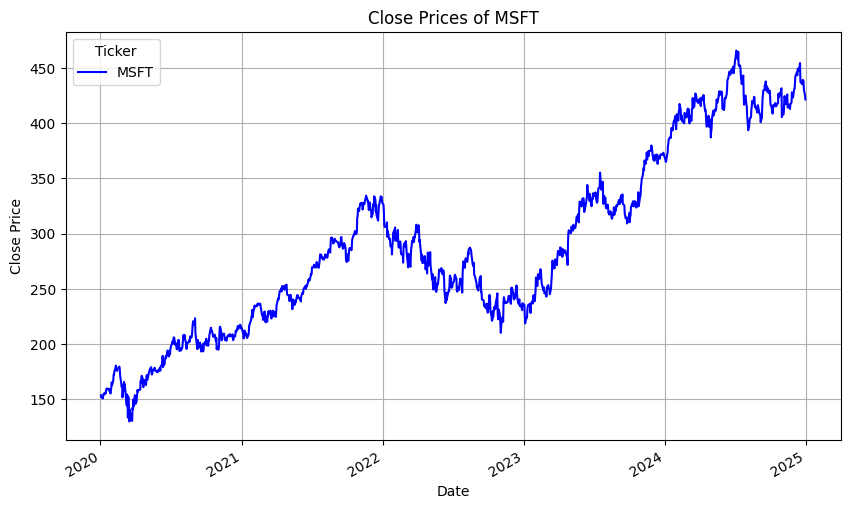

In [6]:
# Plot the close prices
close_prices.plot(title=f'Close Prices of {ticker}', color='blue', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()


### Returns
We plot the time series of the daily returns to observe their distribution and trends.


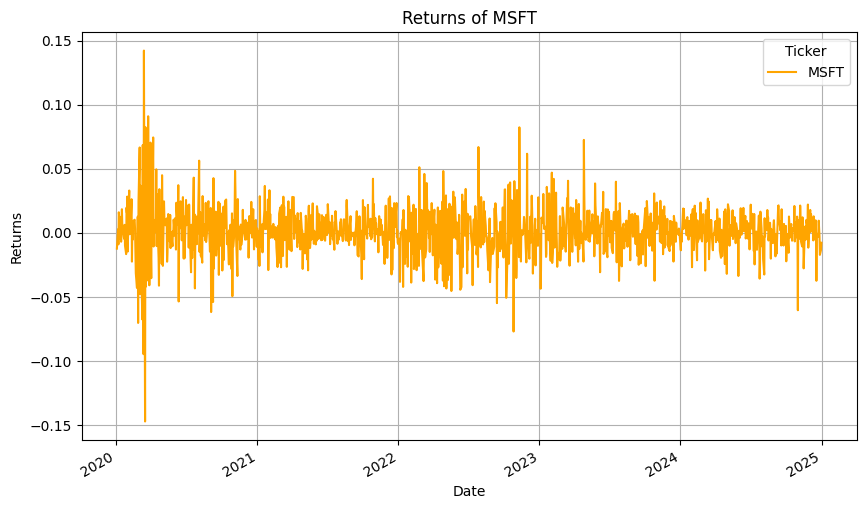

In [7]:
# Plot the returns
returns.plot(title=f'Returns of {ticker}', color='orange', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid()
plt.show()


## Conclusion
From the stationarity tests:
- The close prices are non-stationary as indicated by both the ADF and KPSS tests.
- The returns are stationary, suggesting they can be used for further time-series modeling.

Visualizations provide an intuitive understanding of the trends in close prices and returns.
